ETL:

Extract 

In [1]:
import json

import pandas as pd

import numpy as np 

import re 

In [2]:
#load json file as list of dicts to clean (not df bcs not flat, aka messy)
# with statement to handle file resource w mode r for read; read into variable file; 
# use json.load() to save data to new var; wiki movies raw is list of dicts

with open("..\Resources\wikipedia-movies.json", mode = "r") as file: 
    wiki_movies_raw = json.load(file)

In [3]:
#check num of dicts in list 
len(wiki_movies_raw)

7311

In [4]:
#check sample w index slices (use case for negative index slices)

#beginning 
wiki_movies_raw[:5]

#end
wiki_movies_raw[-5:]

#mid
wiki_movies_raw[3000:3005]

[{'url': 'https://en.wikipedia.org/wiki/Human_Nature_(2001_film)',
  'year': 2001,
  'imdb_link': 'https://www.imdb.com/title/tt0219822/',
  'title': 'Human Nature',
  'Directed by': 'Michel Gondry',
  'Produced by': ['Anthony Bregman',
   'Ted Hope',
   'Spike Jonze',
   'Charlie Kaufman'],
  'Written by': 'Charlie Kaufman',
  'Starring': ['Tim Robbins',
   'Patricia Arquette',
   'Rhys Ifans',
   'Miranda Otto',
   'Rosie Perez'],
  'Music by': 'Graeme Revell',
  'Cinematography': 'Tim Maurice-Jones',
  'Edited by': 'Russell Icke',
  'Productioncompany ': ['StudioCanal', 'Good Machine'],
  'Distributed by': ['Fine Line Features',
   '(United States)',
   'BAC Films',
   '(France)'],
  'Release date': ['May 18, 2001',
   '(',
   '2001-05-18',
   ')',
   '(',
   'Cannes',
   ')',
   'September 12, 2001',
   '(',
   '2001-09-12',
   ')',
   '(France)',
   'April 12, 2002',
   '(',
   '2002-04-12',
   ')',
   '(United States)'],
  'Running time': '96 minutes',
  'Country': ['United State

In [5]:
#load kaggle meta and rating data; confirmed flat so load directly into df 

kaggle_metadata = pd.read_csv("..\Resources\movies_metadata.csv", low_memory=False)

ratings = pd.read_csv("../Resources/ratings.csv")

In [6]:
kaggle_metadata.sample(n=5)

ratings.sample(n=3)

,userId,movieId,rating,timestamp
8250088,85068,593,3.0,1276545955
24160880,250998,5080,3.5,1214009463
19436872,201829,3753,4.5,1068096824


Transform

iterative: inspect, plan, execute 

In [7]:
# inspect w df 

wiki_movies_df = pd.DataFrame(wiki_movies_raw)

wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [9]:
#list comp to filter
# dir and imbd filter removed ~100, count now 7080

wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie]

len(wiki_movies)

7080

In [10]:
#re-create df - columns down from 198 to 78
wiki_movies_df = pd.DataFrame(wiki_movies)

wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [11]:
#filter for  'No. of episodes'
#creating new list comp here for demo, would often just go back to edit first list comp in workflow

#len 7076 - removed 4 tv shows 

wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie
                and 'No. of episodes' not in movie]

len(wiki_movies)


7076

Functions for cleaning:

8.3.5

In [12]:

def clean_movie(movie):
    movie = dict(movie) #create local non distructive copy (constructor fxn)
    return movie


In [13]:
#inspect languages 
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

#found that lang columns are for alt names in each lang -> combine into dict in one column 

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [14]:
#check columns for alt titles

sorted(wiki_movies_df.columns.to_list())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

Identify alternate title lang 

Also known as 
Arabic
Cantonese
Chinese
French
Hangul
Hebrew
Japanese
Literally
Mandarin
McCune–Reischauer
Original title
Polish
Revised Romanization
Romanized
Russian
Simplified
Traditional
Yiddish

In [15]:
#handle alt titles 
#pseud:
    # 1 empty dict to hold all alt titles
    # 2 loop thru list of alt tittle keys (check if key exists, add to alt titles dict)
    #3 add alt titles dict to movie object


def clean_movie(movie):
    movie = dict(movie) #create local non distructive copy (constructor fxn)
    alt_titles = {}
    

    #combine alternate titles into one list 

    for key in ["Also known as", "Arabic","Cantonese","Chinese","French", "Hepburn",        #1
    "Hangul","Hebrew","Japanese","Literally","Mandarin","McCune–Reischauer",
    "Original title","Polish","Revised Romanization","Romanized","Russian",
    "Simplified","Traditional","Yiddish"]:
        if key in movie:
            alt_titles[key]= movie[key]                                             #2
            movie.pop(key)

    if len(alt_titles) > 0:                                                         #3
        movie['alt_titles'] = alt_titles
    
    #merge column names for alt titles and redundant columns 
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    
    change_column_name("Directed by", "Director")

    change_column_name("Theme music composer", "Composer(s)")

    change_column_name("Country of origin", "Country")

    change_column_name("Distributed by", "Distributor")

    change_column_name("Edited by","Editor(s)")

    change_column_name("Music by","Composer(s)")

    change_column_name("Produced by","Producer(s)")

    change_column_name("Producer","Producer(s)")

    change_column_name("Productioncompanies ","Production company(s)")

    change_column_name("Productioncompany ","Production company(s)")

    change_column_name("Released","Release date")

    change_column_name("Screen story by","Writer(s)")

    change_column_name("Story by","Writer(s)")

    change_column_name("Screenplay by","Writer(s)")

    change_column_name("Written by","Writer(s)")

    change_column_name("Adaptation by","Writer(s)")

    change_column_name("Length","Running time")

    change_column_name("Original release","Release date")


    return movie


clean_movies = [clean_movie(movie) for movie in wiki_movies]

wiki_movies_df = pd.DataFrame(clean_movies)

sorted(wiki_movies_df.columns.to_list())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [16]:
clean_movies[7058]

{'url': 'https://en.wikipedia.org/wiki/Capernaum_(film)',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt8267604/',
 'title': 'Capernaum',
 'Starring': ['Zain Al Rafeea',
  'Yordanos Shiferaw',
  'Boluwatife Bankole',
  'Kawthar Al Haddad',
  'Fadi Kamel Youssef',
  'Nour el Husseini',
  'Alaa Chouchnieh',
  'Cedra Izam',
  'Nadine Labaki',
  'Joseph Jimbazian',
  'Farah Hasno'],
 'Cinematography': 'Christopher Aoun',
 'Release date': ['17 May 2018',
  '(',
  '2018-05-17',
  ')',
  '(',
  'Cannes',
  ')',
  '20 September 2018',
  '(',
  '2018-09-20',
  ')',
  '(Lebanon)'],
 'Running time': '126 minutes',
 'Country': 'Lebanon',
 'Language': ['Arabic', 'Amharic'],
 'Budget': '$4 million',
 'Box office': '$68.6 million',
 'alt_titles': {'Arabic': 'کفرناحوم\u200e'},
 'Director': 'Nadine Labaki',
 'Distributor': 'Sony Pictures Classics',
 'Editor(s)': 'Konstantin Bock',
 'Composer(s)': 'Khaled Mouzanar',
 'Producer(s)': ['Michel Merkt', 'Khaled Mouzanar'],
 'Production company(s

remove duplicate rows 8.3.7

    - imdb id extract from imdb link
    - regex

In [17]:

#note on regex here:
    # () group 
    # read as raw string 
    # tt matches tt
    # \d digits
    # {7}exactly 7
wiki_movies_df["imdb_id"] =wiki_movies_df["imdb_link"].str.extract(r"(tt\d{7})")

In [18]:
wiki_movies_df["imdb_id"]

0       tt0098987
1       tt0098994
2       tt0099005
3       tt0099012
4       tt0099018
          ...    
7071    tt1255919
7072    tt6266538
7073    tt4669788
7074    tt7137380
7075    tt9495224
Name: imdb_id, Length: 7076, dtype: object

In [19]:
print(len(wiki_movies_df))


7076


In [20]:
#duplicates dropped - 43 
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)

print(len(wiki_movies_df))

wiki_movies_df.head()

sorted(wiki_movies_df.columns.to_list())

7033


['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

remove mostly null columns

In [21]:
(wiki_movies_df["Animation by"].notnull()).value_counts()

False    7031
True        2
Name: Animation by, dtype: int64

In [22]:
#list comp to find nulls

[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [23]:
#programmatically remove 90%+ null values - adjust above list comp


wiki_columns_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) *0.9]

wiki_movies_df = wiki_movies_df[wiki_columns_keep]

In [24]:
#checked trimmed columns 
#from 191 columns to 21 columns 
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

8.3.8 parse data (typing)

In [25]:
#notes: 
    # release date => date obj
    # running time => num
    # box office => num
    # budget => num 
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [26]:
#box office parsing 

box_office = wiki_movies_df["Box office"].dropna()

In [27]:
#def example for box office, then lambda next bcs one time use 

def is_not_a_string(x):
    return type(x) != str

box_office[box_office.map(is_not_a_string)]

#136 results 

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [28]:
#lambda version of is not a string

box_office[box_office.map(lambda x: type(x) !=str)]


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [29]:
#lambda with join and space as joining char 

box_office = box_office.apply(lambda x: " ".join(x) if type(x) == list else x)

In [30]:
type(box_office[0])

box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [31]:
#first regex form (use r to have escape chars work)

#3918 returns that match form one 

form_one = r"\$\d+\.?\d*\s*[mb]illion"

box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [32]:
#form two 

#1559 returns that match form one

form_two = r"\$\d{1,3}(?:,\d{3})+"

box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [33]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)

matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [34]:
#check box office values form matching 
#count 47

box_office[~matches_form_one & ~matches_form_two]


34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [35]:
#fix pattern matches
    # 1 space btw dollar sign and num => \s* after dollar signs
    # 2 period thousands sep not comma => [,/.] and neg look ahead group for ?!\s[mb] (not capture 1.2 bil as 1,2)
    # 3 values as range => .str.replace(r"\$.*[-—–](?![a-z])", "$"", regex=True)
    # 4 million sic "millon" => [mb]illi?on (optional second i)

box_office = box_office.str.replace(r"\$.*[-—–](?![a-z])", "$", regex=True)

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)'


In [36]:

#count 19 non matches (down from 47)
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)

matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)
box_office[~matches_form_one & ~matches_form_two].count()


19

In [37]:
#extract and convert box office values 

# box_office.str.extract(f"({form_one}|{form_two})")

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan


    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value 

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value 

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s) 

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan


In [38]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [39]:
wiki_movies_df["box_office"]

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [40]:
wiki_movies_df.drop("Box office", axis = 1, inplace=True)

8.3.11 parse budget data 

In [41]:
budget = wiki_movies_df["Budget"].dropna()

In [42]:
#lists to strings

budget = budget.map(lambda x: " ".join(x) if type(x) == list else x)

In [43]:
#remove values btw dollar sign and hyphen for ranges
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)



In [44]:
#fix pattern matches - budget same as box office 
    # 1 space btw dollar sign and num => \s* after dollar signs
    # 2 period thousands sep not comma => [,/.] and neg look ahead group for ?!\s[mb] (not capture 1.2 bil as 1,2)
    # 3 values as range => .str.replace(r"\$.*[-—–](?![a-z])", "$"", regex=True)
    # 4 million sic "millon" => [mb]illi?on (optional second i)

budget = budget.str.replace(r"\$.*[-—–](?![a-z])", "$", regex=True)

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)'

In [45]:
#38 not matching => notice citation ref [#]
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)

matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)

budget[~matches_form_one & ~matches_form_two]


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [46]:
#remove citation refs

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two].count()

C:\Users\sarah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


38

In [47]:
#reuse parse dollars fxn

wiki_movies_df["budget"] = budget.str.extract(f"({form_one}|{form_two})", flags=re.IGNORECASE)[0].apply(parse_dollars)

In [48]:
#drop pre-cleaned data 
wiki_movies_df.drop("Budget", axis = 1, inplace=True)

In [49]:
#parse release date 

#convert list to strings(same lambda as above)

release_date = wiki_movies_df["Release date"].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)


In [50]:
#forms
    # full month name, on or two digit day, four dig year (January 1, 2000)
    # four dig year, two dig month, two dig dat, with any seperator (2000-01-01)
    # full month, four dig year (January 2000)
    # four dig year (2000)

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'



In [51]:
#extract to df with datetime 
wiki_movies_df["release date"] = pd.to_datetime(release_date.str.extract(f"({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})", flags=re.IGNORECASE)[0], infer_datetime_format=True)

In [52]:
#drop pre-cleaned data 
wiki_movies_df.drop("Release date", axis = 1, inplace=True)

In [53]:
#parse running time

#variable hold non null values and list to strings

running_time = wiki_movies_df["Running time"].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)

In [54]:
#check how many follow form ### minutes

#count 6528

running_time.str.contains(r"^\d*\s*minutes$", flags = re.IGNORECASE, na = False).sum()

6528

In [55]:
#check do not follow form 
running_time[running_time.str.contains(r"^\d*\s*minutes$", flags = re.IGNORECASE, na = False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [56]:
#more general: include min abbrev
#6888 follow 

running_time.str.contains(r"(\d+)\s*m", flags = re.IGNORECASE, na = False).sum()

C:\Users\sarah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


6888

In [57]:
#make regex more flexible for hour + minute forms - additional form 

running_time.str.contains(r"(\d+)\s*ho?u?r?s?\s*(\d*)", flags = re.IGNORECASE, na = False).sum()

C:\Users\sarah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


5

In [58]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [59]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)


In [60]:
#rows = capture groups (0 = hrs 1= mins, 2 = form two mins)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [61]:
#convert capture groups from hrmin form into minutes and save to df 

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)


In [62]:
#drop pre-cleaned data
wiki_movies_df.drop('Running time', axis=1, inplace=True)

8.3.12
Clean the Kaggle Data

In [63]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [64]:
#convert d types - adult and video to boolean

#adult 
#checked - bad data found 

kaggle_metadata["adult"].value_counts()


False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [65]:
#missing imdb id so need to drop 

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#drop all except adult == False then drop column

kaggle_metadata = kaggle_metadata[kaggle_metadata["adult"]== "False"].drop("adult", axis = "columns")

In [67]:
#video - clean all boolean 

kaggle_metadata["video"].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [68]:
#create boolean column 
kaggle_metadata["video"] == "True"

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [69]:
#assign back to video 

kaggle_metadata["video"] - kaggle_metadata["video"] == "True"

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [70]:
#numeric columns use to_numeric() method pd

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [71]:
#release date to datetime pd 
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [73]:
#reasonability checks on ratings data 
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\sarah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [74]:
#time format
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [75]:
#assign to column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

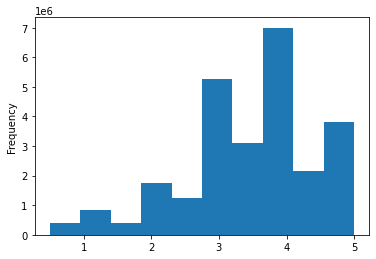

In [77]:
#check ratings w histogram

pd.options.display.float_format = '{:20,.2f}'.format

ratings['rating'].plot(kind='hist')

ratings['rating'].describe()
